# Lab Assignment

## Tasks

Create a K-Means model with the following conditions:
1. Use the 'Mall_Customers.csv' data.
2. Determine the appropriate features for clustering (at least 2).
3. Create a K-Means model considering the best number of clusters.
4. Reimplement the model by using SOM.

Step 1 - Import Library

In [2]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('Mall_Customers.csv')

# Peek Data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

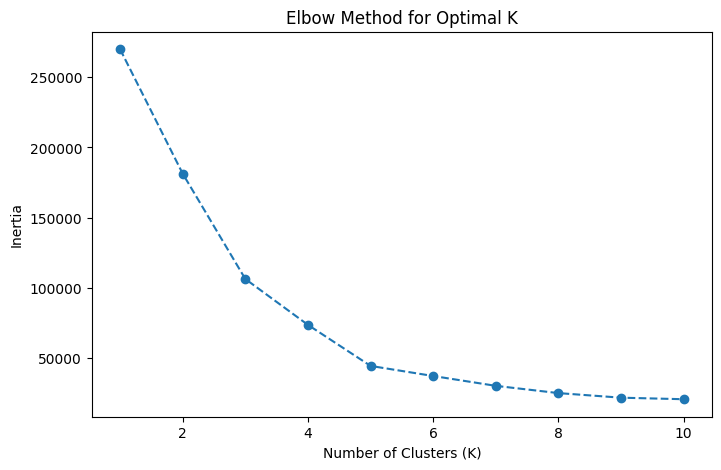

In [4]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Step 2 - Create K means model

In [5]:
# Create the K-Means model with K=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 3 - Plot Cluster

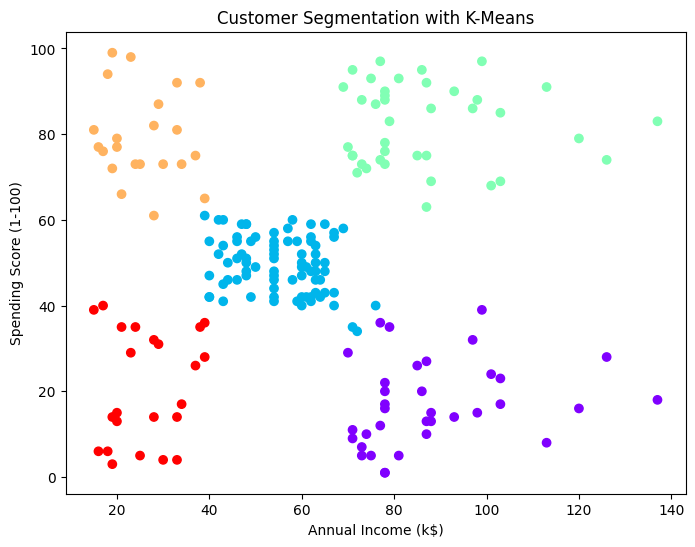

In [6]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-Means')
plt.show()

Check the value of SSE

In [7]:
print(f'SSE: {kmeans.inertia_}')

SSE: 44448.45544793371


Step 4 - Implement the Elbow method

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

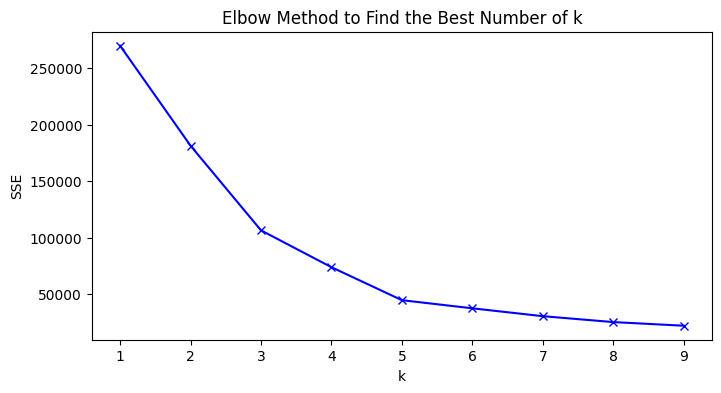

In [9]:
# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find the Best Number of k")
plt.show()

Check the value for each K

In [10]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.595959596
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793371
k=6; SSE=37233.81451071001
k=7; SSE=30259.65720728547
k=8; SSE=25029.253424935883
k=9; SSE=21806.812998695455


Step 1 - Import Library

In [11]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

Step 2 - Implement SOM

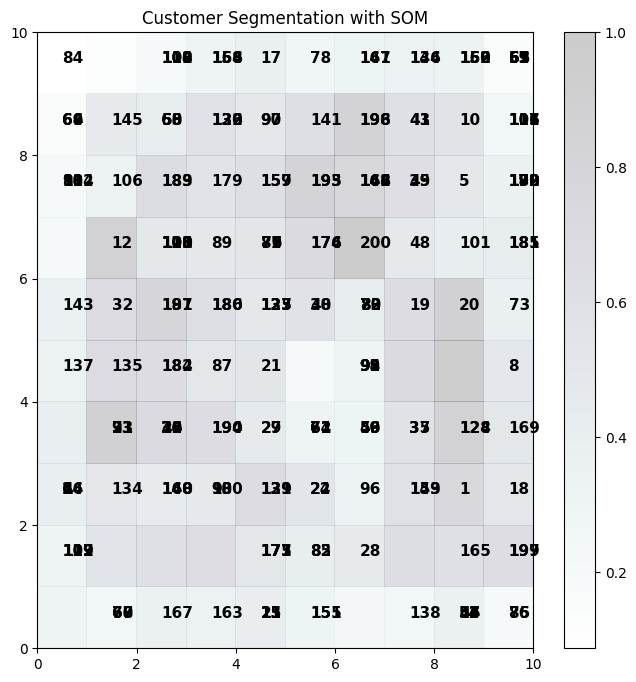

In [12]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

# Initialize SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], normalized_data.shape[1], sigma=0.5, learning_rate=0.5)

# Initialize random weights
som.random_weights_init(normalized_data)

# Train SOM
num_epochs = 100
som.train_random(normalized_data, num_epochs)

# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(normalized_data):
    w = som.winner(x)  # Winning neuron for sample x
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i + 1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()
plt.title('Customer Segmentation with SOM')
plt.show()